Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



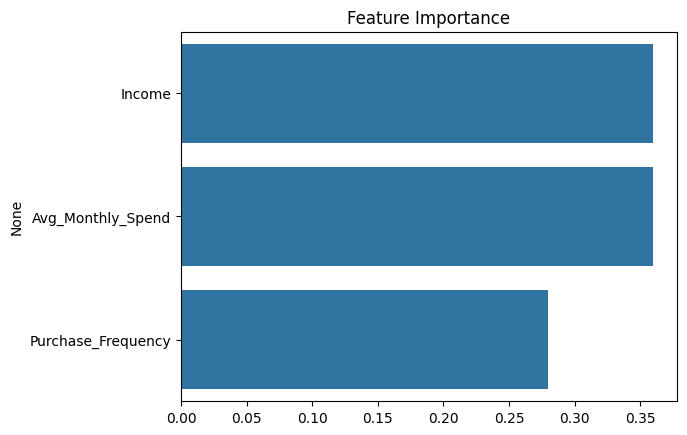

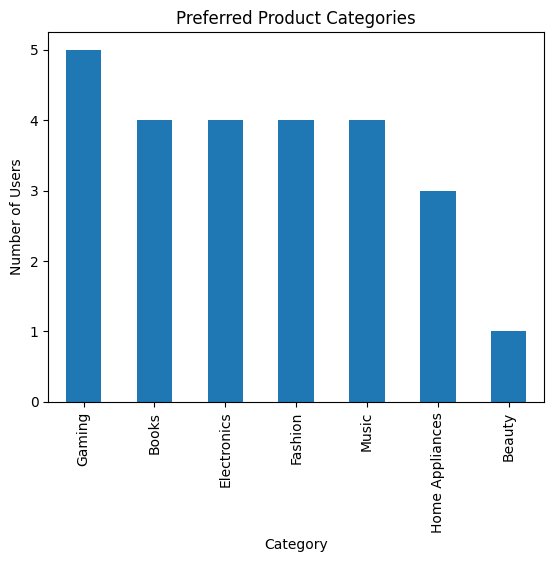

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = {
    "User_ID": range(1, 26),
    "Income": [80000, 45000, 70000, 30000, 90000, 40000, 100000, 35000, 75000, 20000,
               85000, 50000, 95000, 55000, 60000, 25000, 65000, 40000, 78000, 30000,
               72000, 48000, 99000, 37000, 52000],
    "Avg_Monthly_Spend": [1500, 400, 1200, 200, 2500, 500, 3000, 300, 1800, 150,
                          1600, 600, 2700, 800, 1100, 200, 1400, 400, 1700, 250,
                          1500, 500, 2900, 350, 800],
    "Purchase_Frequency": [10, 3, 8, 2, 15, 4, 20, 5, 12, 1, 14, 6, 18, 7, 9, 3, 11, 2, 13, 4, 10, 6, 19, 3, 5],
    "Credit_Card_Eligibility": ["Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No",
                                 "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No",
                                 "Yes", "No", "Yes", "No", "No"],
    "Preferred_Category": ["Electronics", "Fashion", "Home Appliances", "Books", "Gaming",
                           "Beauty", "Electronics", "Music", "Gaming", "Books",
                           "Electronics", "Fashion", "Gaming", "Home Appliances", "Fashion",
                           "Music", "Home Appliances", "Books", "Gaming", "Music",
                           "Electronics", "Books", "Gaming", "Music", "Fashion"]
}

df = pd.DataFrame(data)

# Preprocess dataset
df['Credit_Card_Eligibility'] = df['Credit_Card_Eligibility'].map({'Yes': 1, 'No': 0})

# Features and target for credit card eligibility
X = df[['Income', 'Avg_Monthly_Spend', 'Purchase_Frequency']]
y = df['Credit_Card_Eligibility']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importance = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance")
plt.show()

# Group users by preferred category for product recommendations
recommendations = df.groupby('Preferred_Category').size().sort_values(ascending=False)
recommendations.plot(kind='bar', title="Preferred Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Users")
plt.show()
